In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='softplus'))
model.add(Conv2D(128, (3, 3), activation='softplus'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='softplus'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=400, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 2.30122, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 2.30122 to 1.98939, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 1.98939 to 0.70210, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.70210 to 0.61302, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.61302 to 0.56579, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.56579 to 0.53234, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.53234 to 0.49609, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.49609 to 0.48499, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.48499 to 0.45899, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.45899 to 0.44665, saving model to ./MNIST_CNN.hdf5

Epoch 11: val_loss improved from 0.44665 to 0.41505, saving model to ./MNIST_CNN.hdf5

Epoch 12: val_loss improved from 0.41505 to 0.40162, sa

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
del model

In [ ]:
model = load_model('MNIST_CNN.hdf5')

In [ ]:
import random

In [ ]:
input_data = np.expand_dims(X_test[0], axis=0)

In [ ]:
model.predict(input_data).tolist()[0].index(max(model.predict(input_data).tolist()[0]))

1/1 [==============================] - 0s 29ms/step


9

In [ ]:
def pred(ran):
  for i in ran:
    plt.imshow(X_test[i] , cmap = 'gray')
    plt.show()
    input_data = np.expand_dims(X_test[i] , axis = 0)
    a = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandol','Shirt','Sneaker','Bag','Ankle Boot']
    print(f'X_test에서 인덱스가 {i} 에 위치한 이미지는 {a[model.predict(input_data).tolist()[0].index(max(model.predict(input_data).tolist()[0]))]} 입니다.')

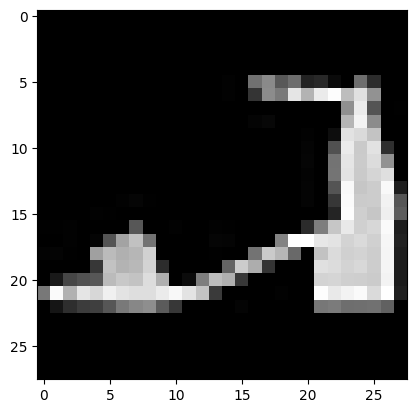

1/1 [==============================] - 0s 27ms/step
X_test에서 인덱스가 2384 에 위치한 이미지는 Sandol 입니다.


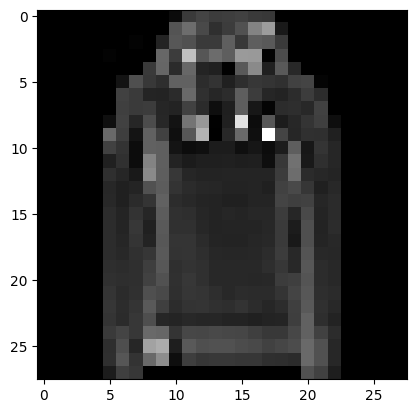

1/1 [==============================] - 0s 25ms/step
X_test에서 인덱스가 1154 에 위치한 이미지는 Pullover 입니다.


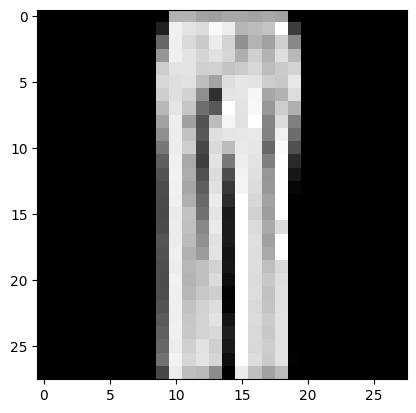

1/1 [==============================] - 0s 26ms/step
X_test에서 인덱스가 417 에 위치한 이미지는 Trouser 입니다.


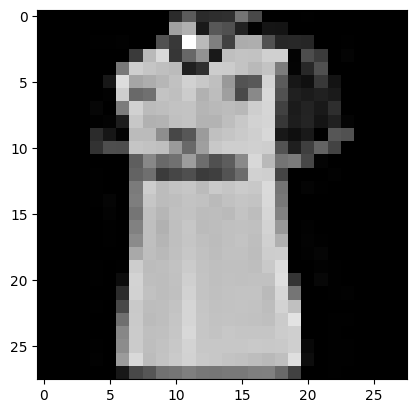

1/1 [==============================] - 0s 27ms/step
X_test에서 인덱스가 8317 에 위치한 이미지는 T-shirt/top 입니다.


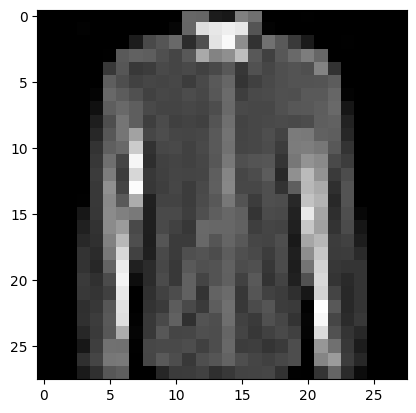

1/1 [==============================] - 0s 84ms/step
X_test에서 인덱스가 4467 에 위치한 이미지는 Shirt 입니다.


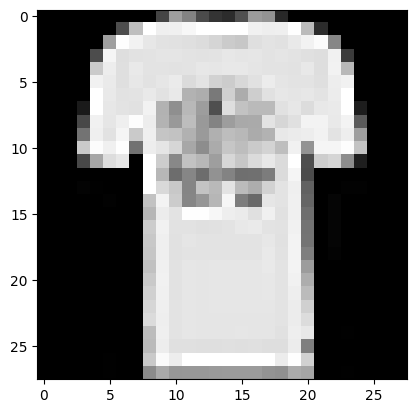

1/1 [==============================] - 0s 25ms/step
X_test에서 인덱스가 9929 에 위치한 이미지는 T-shirt/top 입니다.


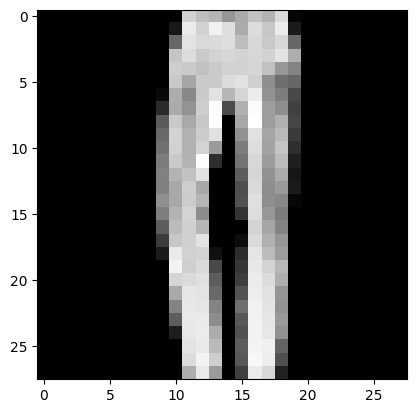

1/1 [==============================] - 0s 83ms/step
X_test에서 인덱스가 6173 에 위치한 이미지는 Trouser 입니다.


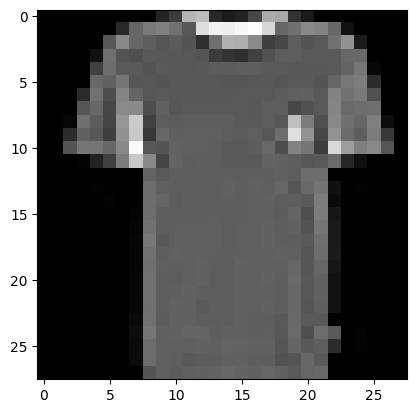

1/1 [==============================] - 0s 18ms/step
X_test에서 인덱스가 5058 에 위치한 이미지는 T-shirt/top 입니다.


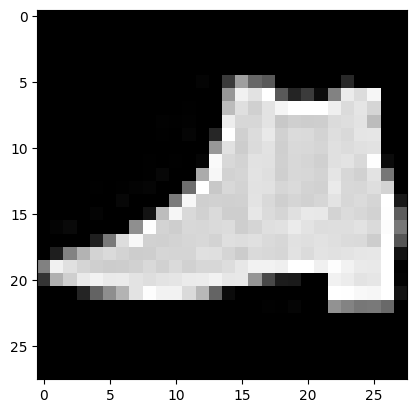

1/1 [==============================] - 0s 18ms/step
X_test에서 인덱스가 5449 에 위치한 이미지는 Ankle Boot 입니다.


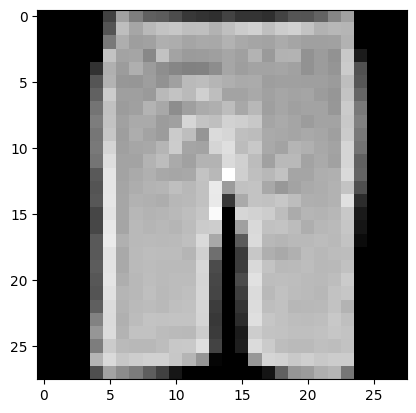

1/1 [==============================] - 0s 16ms/step
X_test에서 인덱스가 3627 에 위치한 이미지는 Trouser 입니다.


In [ ]:
ran = random.sample(range(10000) , 10)
pred(ran)

# 개 , 고양이 이미지

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-11-21 05:13:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   181MB/s    in 0.4s    

2023-11-21 05:13:25 (181 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [8]:
# 데이터 경로 설정
rootPath = '/tmp/cats_and_dogs_filtered'

# 훈련셋, 검증셋 경로
train_dir = os.path.join(rootPath, 'train') # /tmp/cats_and_dogs_filtered/train
validation_dir = os.path.join(rootPath, 'validation')  # /tmp/cats_and_dogs_filtered/validation

# 훈련셋 중에 고양이 사진 경로
train_cats_dir = os.path.join(train_dir, 'cats') # /tmp/cats_and_dogs_filtered/train/cats
# 훈련셋 중에 강아지 사진 경로
train_dogs_dir = os.path.join(train_dir, 'dogs') # /tmp/cats_and_dogs_filtered/train/dogs


# 검증셋 중에 고양이 사진 경로
validation_cats_dir = os.path.join(validation_dir, 'cats') # /tmp/cats_and_dogs_filtered/validation/cats
# 검증셋 중에 강아지 사진 경로
validation_dogs_dir = os.path.join(validation_dir, 'dogs') # /tmp/cats_and_dogs_filtered/validation/dogs

In [9]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
#print(train_cat_fnames[:10])

print('훈련 데이터 중 고양이 사진 수 : ', len(os.listdir(train_cats_dir)))
print('훈련 데이터 중 강아지 사진 수 : ', len(os.listdir(train_dogs_dir)))

print('검증 데이터 중 고양이 사진 수 : ', len(os.listdir(validation_cats_dir)))
print('검증 데이터 중 강아지 사진 수 : ', len(os.listdir(validation_dogs_dir)))

훈련 데이터 중 고양이 사진 수 :  1000
훈련 데이터 중 강아지 사진 수 :  1000
검증 데이터 중 고양이 사진 수 :  500
검증 데이터 중 강아지 사진 수 :  500


In [10]:
import os
from keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
rootPath = '/tmp/cats_and_dogs_filtered'

# 스케일링 + 데이터 증식 속성 설정
trainImageGenerator = ImageDataGenerator(rescale=1./255,
                                         horizontal_flip = True,
                                         vertical_flip = True,
                                         shear_range = 0.5,
                                         brightness_range = [0.5, 1.5],
                                         zoom_range = 0.2,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         rotation_range = 30,
                                         fill_mode = 'nearest')

# 스케일링 설정
testImageGenerator =  ImageDataGenerator(rescale=1./255)


# 데이터 스케일링 및 증식
trainGen = trainImageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    class_mode = 'binary'
)

testGen = testImageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
print(trainGen.class_indices)
print(testGen.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


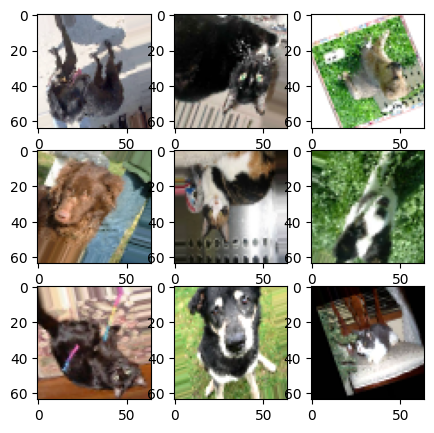

In [12]:
from tensorflow.keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

for i in range(9):
  data = next(trainGen)
  arr = data[0][0]
  plt.subplot(3, 3, i+1)
  # plt.xticks([]) # 눈금 지우기
  # plt.yticks([])
  img = array_to_img(arr)
  plt.imshow(img)

plt.show()

사진 : ['cats']
사진 : 0


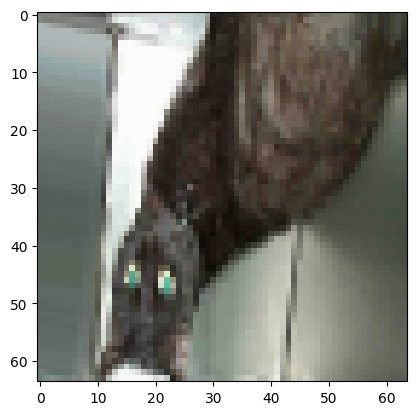

사진 : ['cats']
사진 : 0


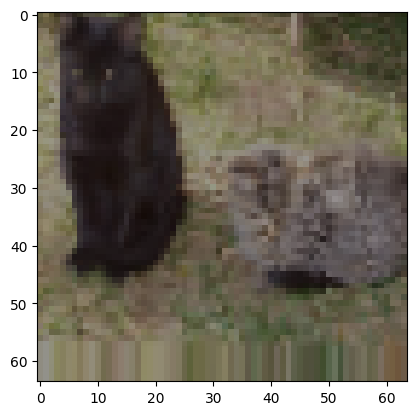

사진 : ['dogs']
사진 : 1


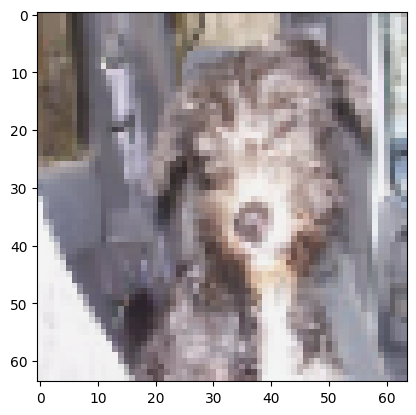

In [13]:
label_index = trainGen.class_indices

# {'cats': 0, 'dogs': 1}
x, y = trainGen.next()

for i in range(0, 3):
  image = x[i]
  label = y[i].astype('int')
  # plt.xticks([]) # 눈금 지우기
  # plt.yticks([])
  print('사진 : {}'.format([k for k, v in label_index.items() if v == label]))
  print('사진 : {}'.format(label))
  plt.imshow(image)
  plt.show()


In [14]:
from keras.models import Sequential
from keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(trainGen, epochs = 64, validation_data = testGen, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/64
63/63 [==============================] - 20s 138ms/step - loss: 0.7389 - acc: 0.4745 - val_loss: 0.6928 - val_acc: 0.5460


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/64
63/63 [==============================] - 7s 109ms/step - loss: 0.6914 - acc: 0.5255 - val_loss: 0.6903 - val_acc: 0.5570
Epoch 3/64
63/63 [==============================] - 8s 133ms/step - loss: 0.6858 - acc: 0.5520 - val_loss: 0.6809 - val_acc: 0.5840
Epoch 4/64
63/63 [==============================] - 7s 107ms/step - loss: 0.6764 - acc: 0.5685 - val_loss: 0.6690 - val_acc: 0.6280
Epoch 5/64
63/63 [==============================] - 8s 132ms/step - loss: 0.6598 - acc: 0.6170 - val_loss: 0.6574 - val_acc: 0.6310
Epoch 6/64
63/63 [==============================] - 9s 142ms/step - loss: 0.6484 - acc: 0.6260 - val_loss: 0.6453 - val_acc: 0.6280
Epoch 7/64
63/63 [==============================] - 7s 115ms/step - loss: 0.6395 - acc: 0.6300 - val_loss: 0.6307 - val_acc: 0.6350
Epoch 8/64
63/63 [==============================] - 8s 134ms/step - loss: 0.6265 - acc: 0.6425 - val_loss: 0.6278 - val_acc: 0.6540
Epoch 9/64
63/63 [==============================] - 7s 119ms/step - loss: 0.

1/1 [==============================] - 0s 19ms/step
정답: 강아지  label : 1
예측: 강아지  predicted value : [[0.53351927]]


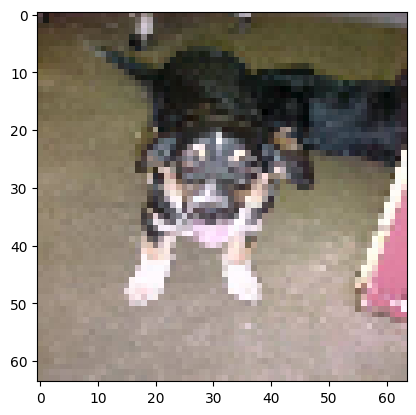

1/1 [==============================] - 0s 28ms/step
정답: 강아지  label : 1
예측: 고양이  predicted value : [[0.42576727]]


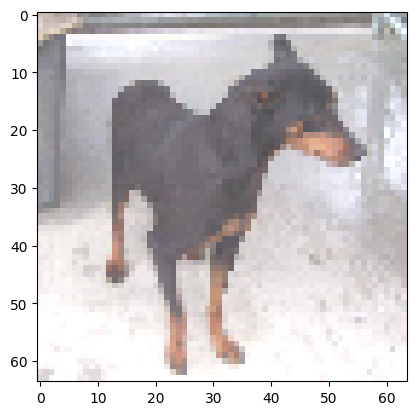

1/1 [==============================] - 0s 18ms/step
정답: 고양이  label : 0
예측: 고양이  predicted value : [[0.20324108]]


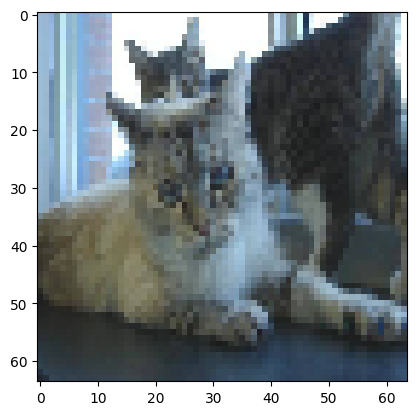

1/1 [==============================] - 0s 19ms/step
정답: 강아지  label : 1
예측: 고양이  predicted value : [[0.40689048]]


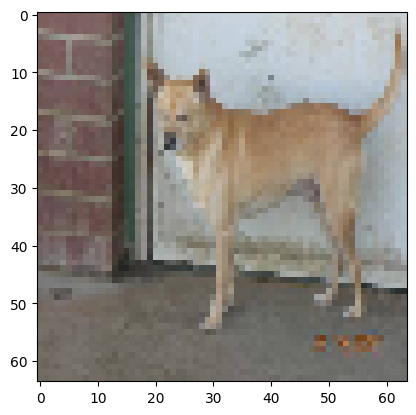

1/1 [==============================] - 0s 17ms/step
정답: 강아지  label : 1
예측: 고양이  predicted value : [[0.41892424]]


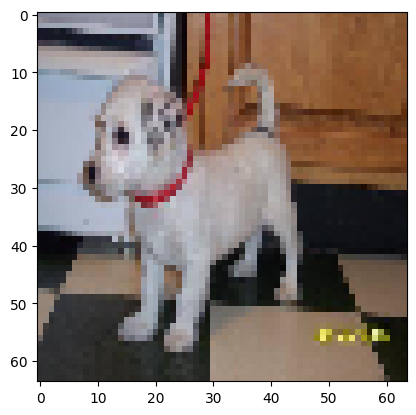

In [17]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

label_index = ['고양이', '강아지']

x, y = testGen.next()
for i in range(0,5):
  image = x[i]
  label = y[i].astype('int')

  y_prob = model.predict(image.reshape(1, 64, 64, 3))
  y_prob_class = (model.predict(image.reshape(1, 64, 64, 3)) > 0.5 ).astype('int')[0][0]
  print('정답: {}'.format(label_index[label]), ' label :', label)
  print('예측: {}'.format(label_index[y_prob_class]), ' predicted value :', y_prob)
  plt.imshow(image)
  plt.show()

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib

new_base_dir = pathlib.Path("/tmp/cats_and_dogs_filtered")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
print(train_dataset)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
combined_dataset = train_dataset.concatenate(validation_dataset)

In [ ]:

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='softplus'))  # Adjust input shape
model.add(Conv2D(128, (3, 3), activation='softplus'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='softplus'))
model.add(Dense(64 , activation = 'softplus'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath = "./best_model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset ,  epochs=20 , batch_size=200, verbose=0, validation_data=validation_dataset , callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.69609, saving model to ./best_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.69609

Epoch 3: val_loss did not improve from 0.69609

Epoch 4: val_loss did not improve from 0.69609

Epoch 5: val_loss did not improve from 0.69609

Epoch 6: val_loss did not improve from 0.69609

Epoch 7: val_loss did not improve from 0.69609

Epoch 8: val_loss did not improve from 0.69609

Epoch 9: val_loss did not improve from 0.69609

Epoch 10: val_loss did not improve from 0.69609

Epoch 11: val_loss did not improve from 0.69609


In [19]:
y_vloss = history.history['val_loss'][1:]
y_loss = history.history['loss'][1:]
acc = history.history['acc']
acc2 = history.history['val_acc']

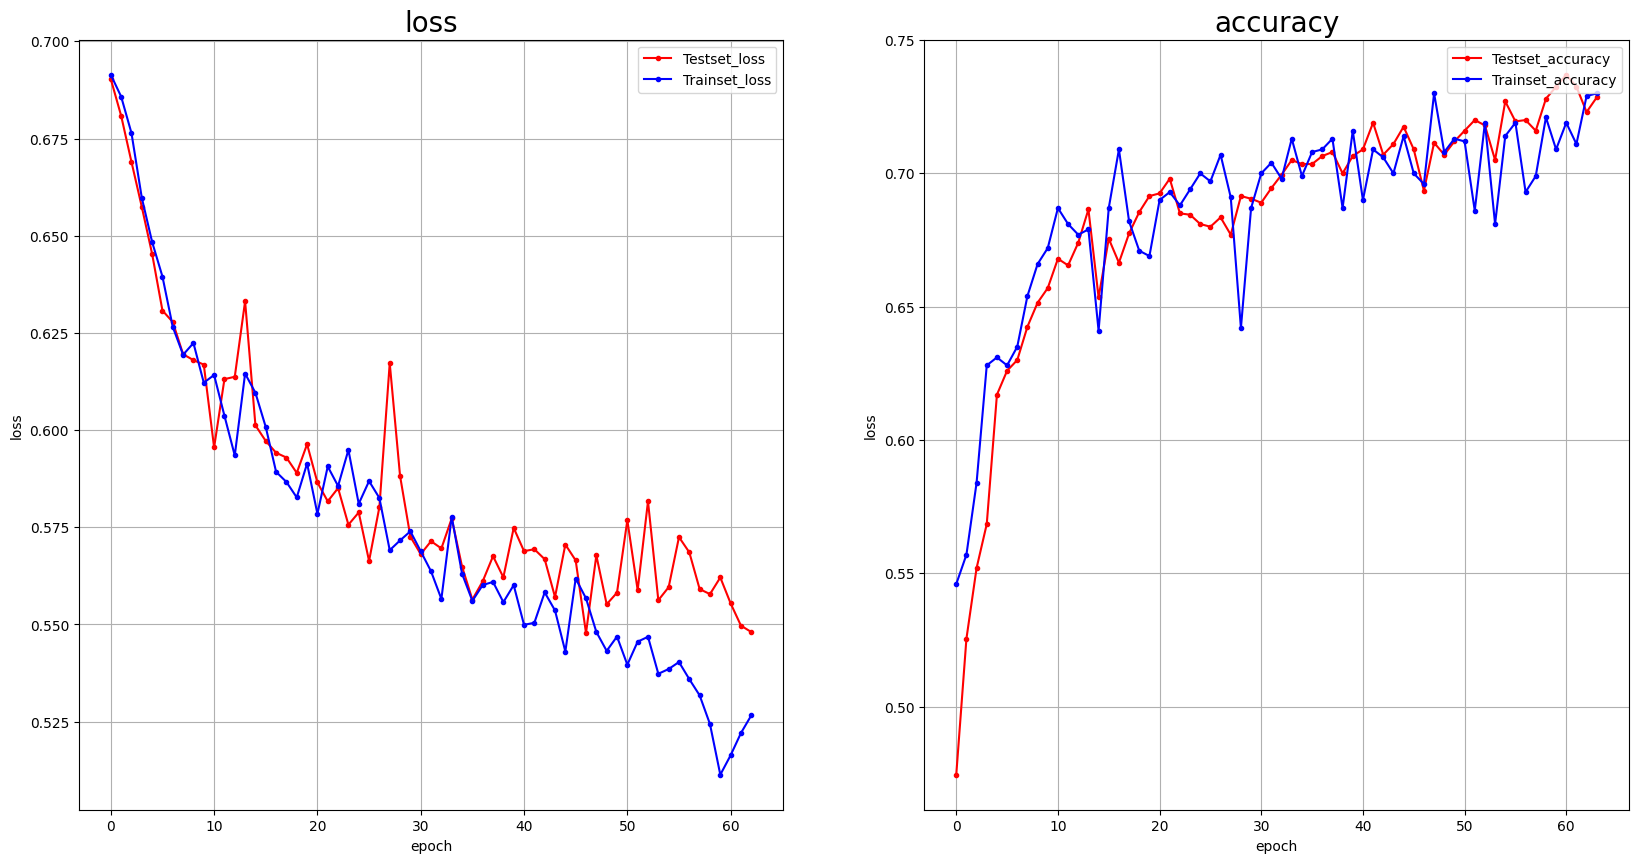

In [20]:
x_len = np.arange(len(y_loss))
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss' , size = 20)

plt.subplot(1,2,2)
x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c="red", label='Testset_accuracy')
plt.plot(x_len, acc2, marker='.', c="blue", label='Trainset_accuracy')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy' , size = 20)
plt.show()